In [1]:
# INSTALLS AND IMPORTS
install.packages("ggplot2")
install.packages("dplyr")

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’





The downloaded binary packages are in
	/var/folders/r0/zkvgyq094gx2l7m_v4j3nhj40000gp/T//RtmpPjCIWn/downloaded_packages


also installing the dependencies ‘generics’, ‘tidyselect’





The downloaded binary packages are in
	/var/folders/r0/zkvgyq094gx2l7m_v4j3nhj40000gp/T//RtmpPjCIWn/downloaded_packages


In [55]:
library(ggplot2)
library(dplyr)

options(repr.plot.width=20, repr.plot.height=8)


In [6]:
# reading the data set and taking a look at the preview
approval_ds <- read.csv("credit_dataset.csv")
head(approval_ds, n=10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
2,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
3,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
4,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
5,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
6,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
7,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
8,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
9,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1


In [7]:
# taking a look at the summary of data
summary(approval_ds)

     Gender            Age             Debt           Married      
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:22.67   1st Qu.: 1.000   1st Qu.:1.0000  
 Median :1.0000   Median :28.46   Median : 2.750   Median :1.0000  
 Mean   :0.6957   Mean   :31.51   Mean   : 4.759   Mean   :0.7609  
 3rd Qu.:1.0000   3rd Qu.:37.71   3rd Qu.: 7.207   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :1.0000  
  BankCustomer      Industry          Ethnicity         YearsEmployed   
 Min.   :0.0000   Length:690         Length:690         Min.   : 0.000  
 1st Qu.:1.0000   Class :character   Class :character   1st Qu.: 0.165  
 Median :1.0000   Mode  :character   Mode  :character   Median : 1.000  
 Mean   :0.7638                                         Mean   : 2.223  
 3rd Qu.:1.0000                                         3rd Qu.: 2.625  
 Max.   :1.0000                                         Max.   :28.500  
  PriorDefaul

In [8]:
# checking if missing values exist
paste0("Gender: Null values - ",sum(is.na(approval_ds$Gender)))
paste0("Age: Null values - ",sum(is.na(approval_ds$Age)))
paste0("Debt: Null values - ",sum(is.na(approval_ds$Debt)))
paste0("Married: Null values - ",sum(is.na(approval_ds$Married)))
paste0("BankCustomer: Null values - ",sum(is.na(approval_ds$BankCustomer)))
paste0("Industry: Null values - ",sum(is.na(approval_ds$Industry)))
paste0("Ethnicity: Null values - ",sum(is.na(approval_ds$Ethnicity)))
paste0("YearsEmployed: Null values - ",sum(is.na(approval_ds$YearsEmployed)))
paste0("PriorDefault: Null values - ",sum(is.na(approval_ds$PriorDefault)))
paste0("Employed: Null values - ",sum(is.na(approval_ds$Employed)))
paste0("CreditScore: Null values - ",sum(is.na(approval_ds$CreditScore)))
paste0("DriversLicense: Null values - ",sum(is.na(approval_ds$DriversLicense)))
paste0("Citizen: Null values - ",sum(is.na(approval_ds$Citizen)))
paste0("ZipCode: Null values - ",sum(is.na(approval_ds$ZipCode)))
paste0("Income: Null values - ",sum(is.na(approval_ds$Income)))
paste0("Approved: Null values - ",sum(is.na(approval_ds$Approved)))

[1] "Gender: Null values - 0"

[1] "Age: Null values - 0"

[1] "Debt: Null values - 0"

[1] "Married: Null values - 0"

[1] "BankCustomer: Null values - 0"

[1] "Industry: Null values - 0"

[1] "Ethnicity: Null values - 0"

[1] "YearsEmployed: Null values - 0"

[1] "PriorDefault: Null values - 0"

[1] "Employed: Null values - 0"

[1] "CreditScore: Null values - 0"

[1] "DriversLicense: Null values - 0"

[1] "Citizen: Null values - 0"

[1] "ZipCode: Null values - 0"

[1] "Income: Null values - 0"

[1] "Approved: Null values - 0"

####   We can clearly see that there are not missing values in both dependent and independent variables to we dont have to perform data imputation

# Exploratory Data Analysis
----

### How income and credit score are varying with respect to credit approval

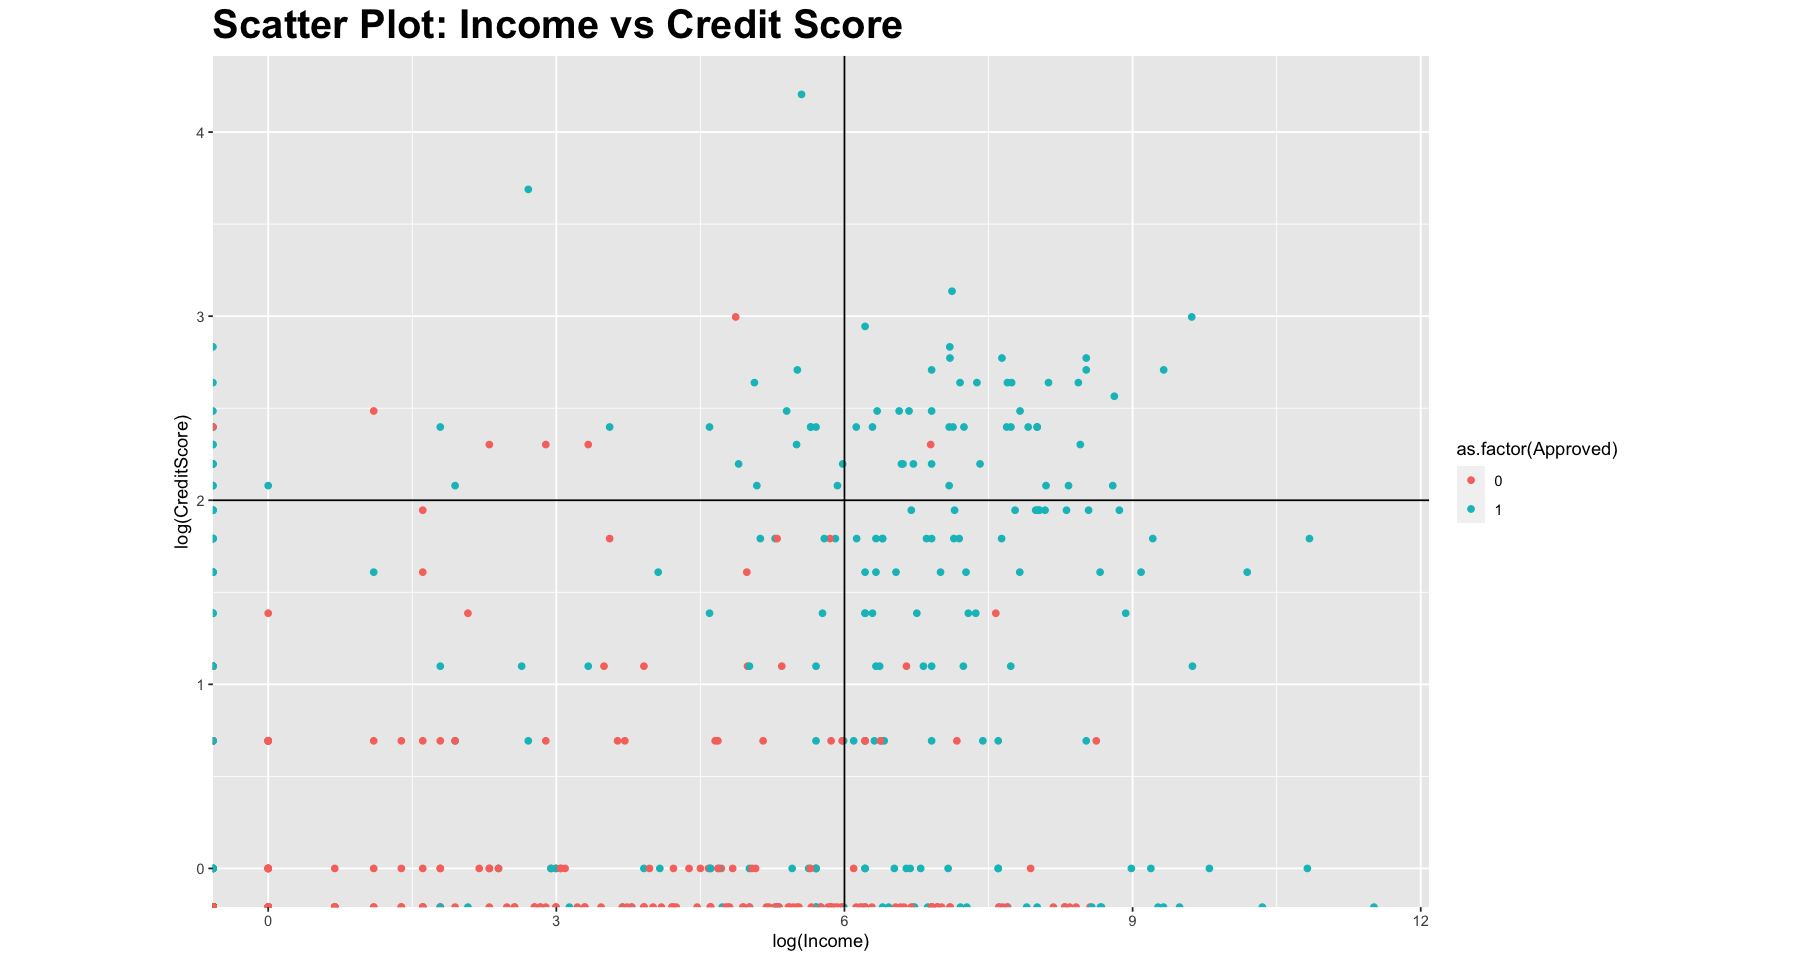

In [25]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(Income), y=log(CreditScore), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Income vs Credit Score ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 6) + geom_hline(yintercept = 2) 
# SOLUTION ENDS HERE

### How Years Employed and credit score are varying with respect to credit approval

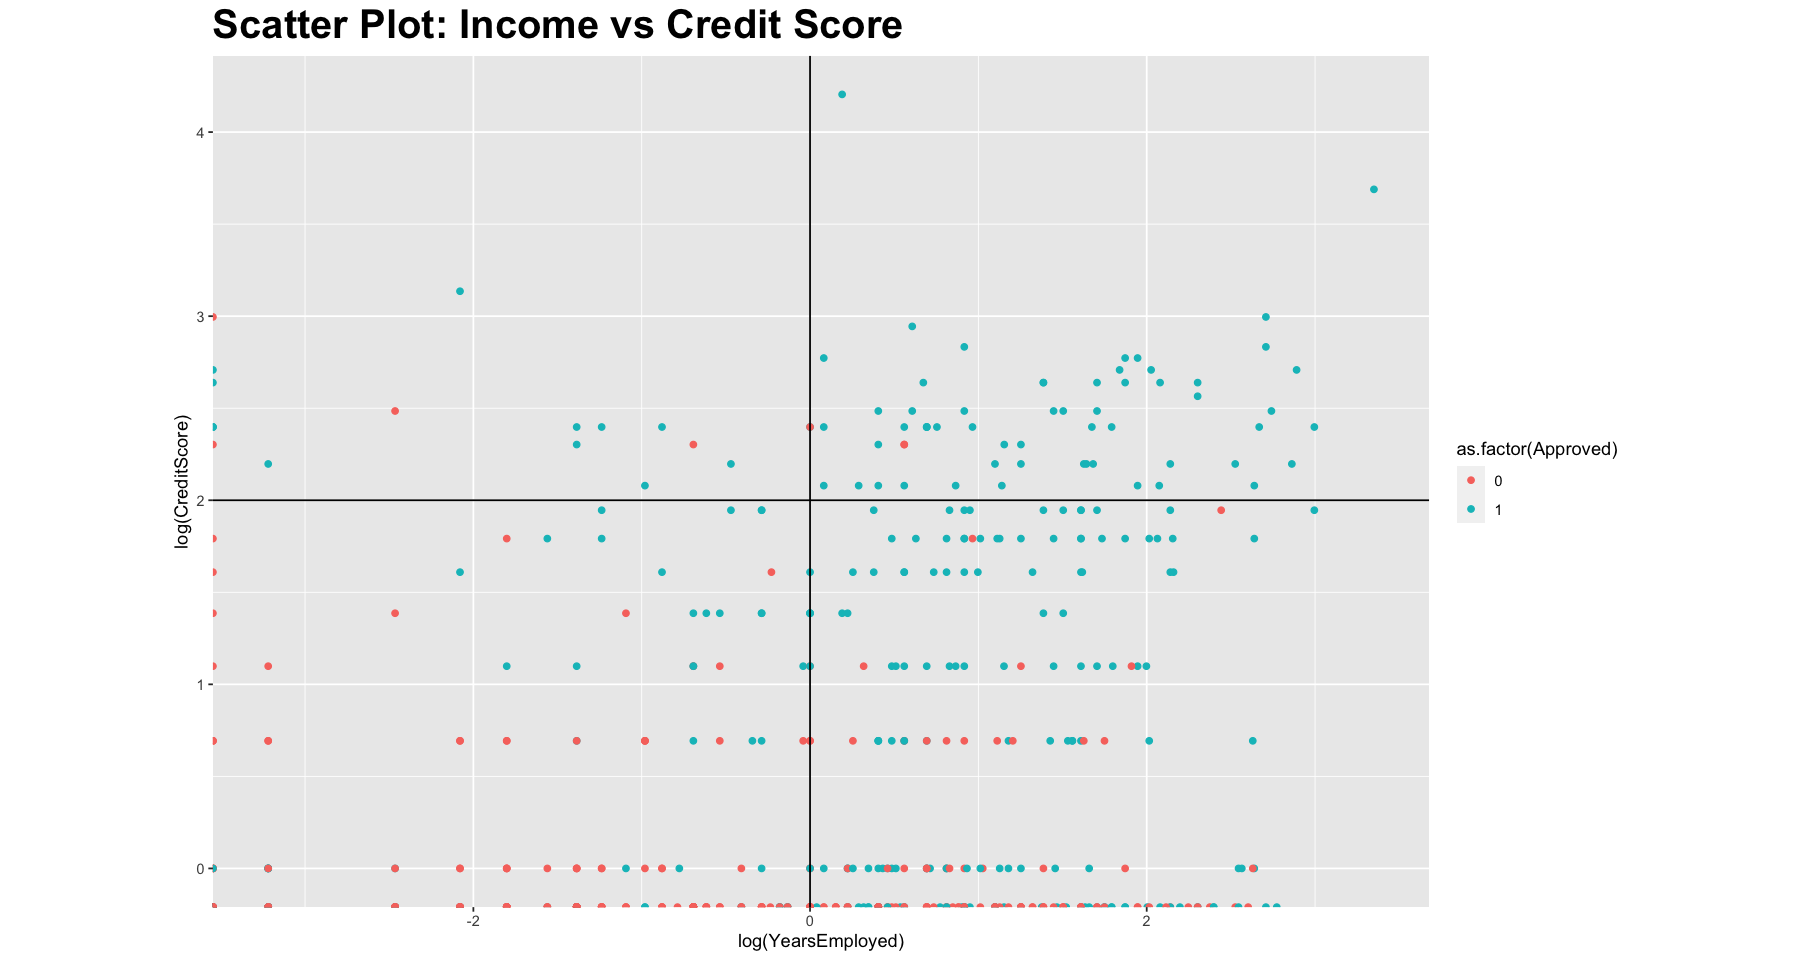

In [24]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=log(CreditScore), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Credit Score ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 2) 
# SOLUTION ENDS HERE

### How Years Employed and Age are varying with respect to credit approval

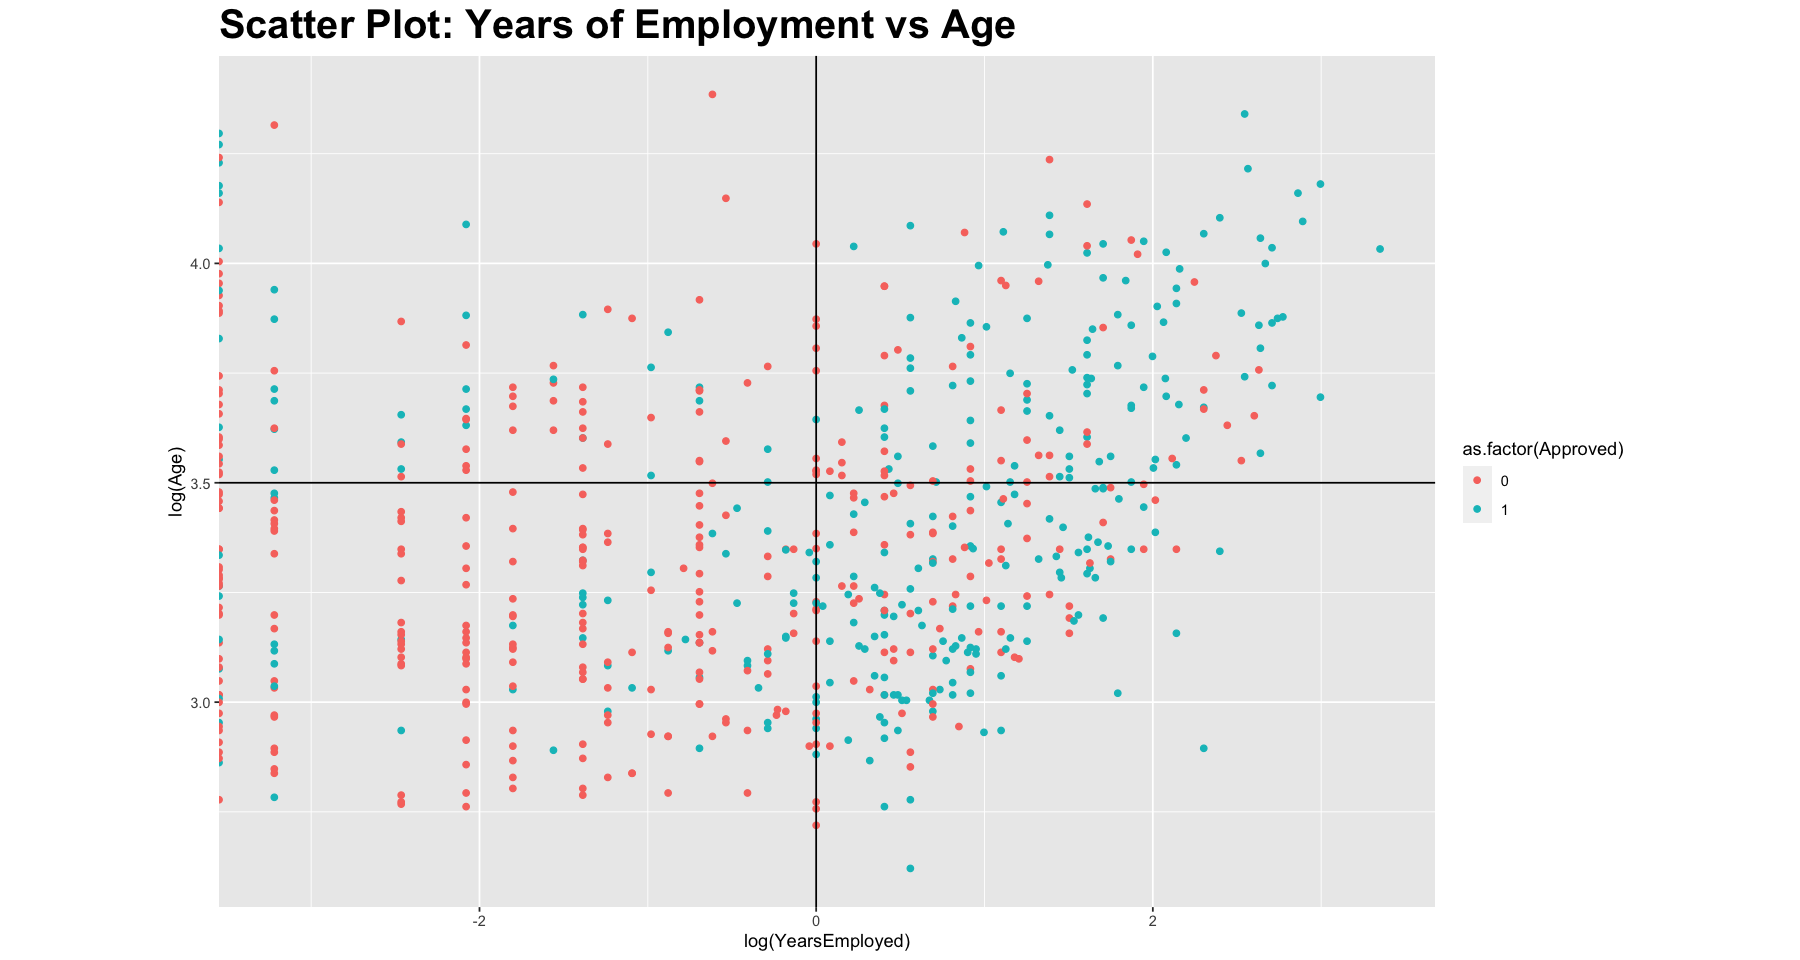

In [29]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=log(Age), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Age ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 3.5) 
# SOLUTION ENDS HERE

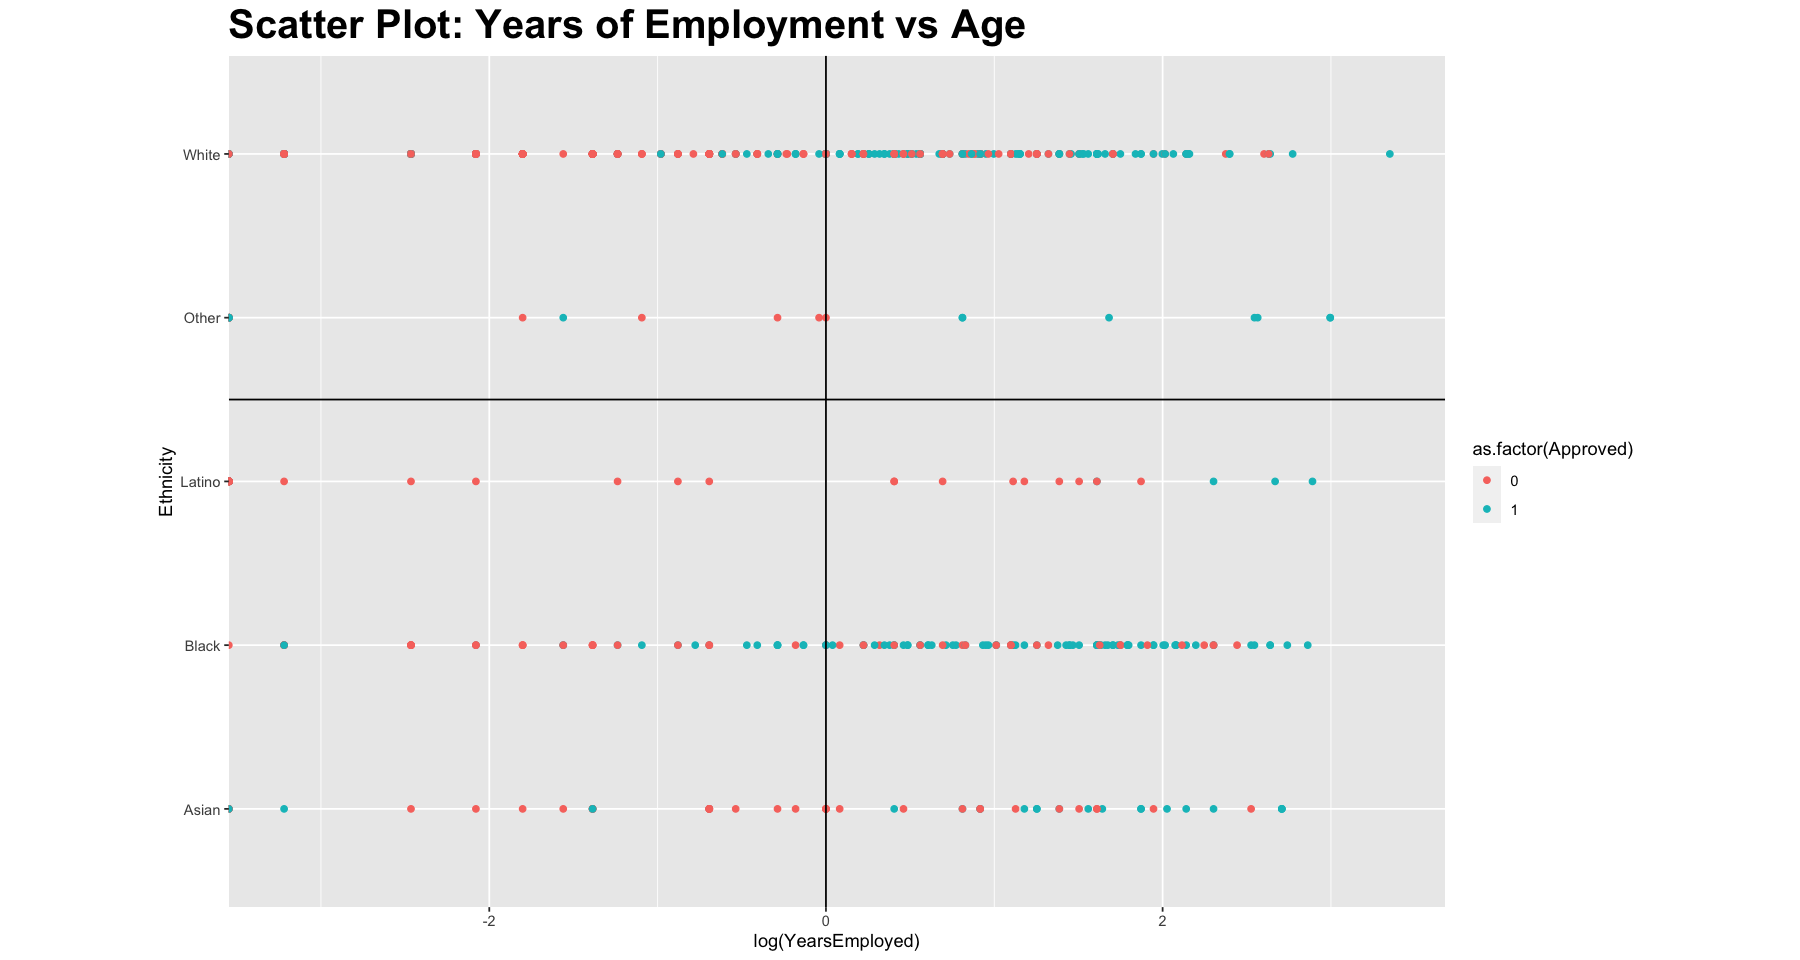

In [31]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=Ethnicity, col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Age ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 3.5) 
# SOLUTION ENDS HERE

# Approval Rating across Gender

Gender,ApprovalRate
<int>,<dbl>
0,0.4666667
1,0.4354167


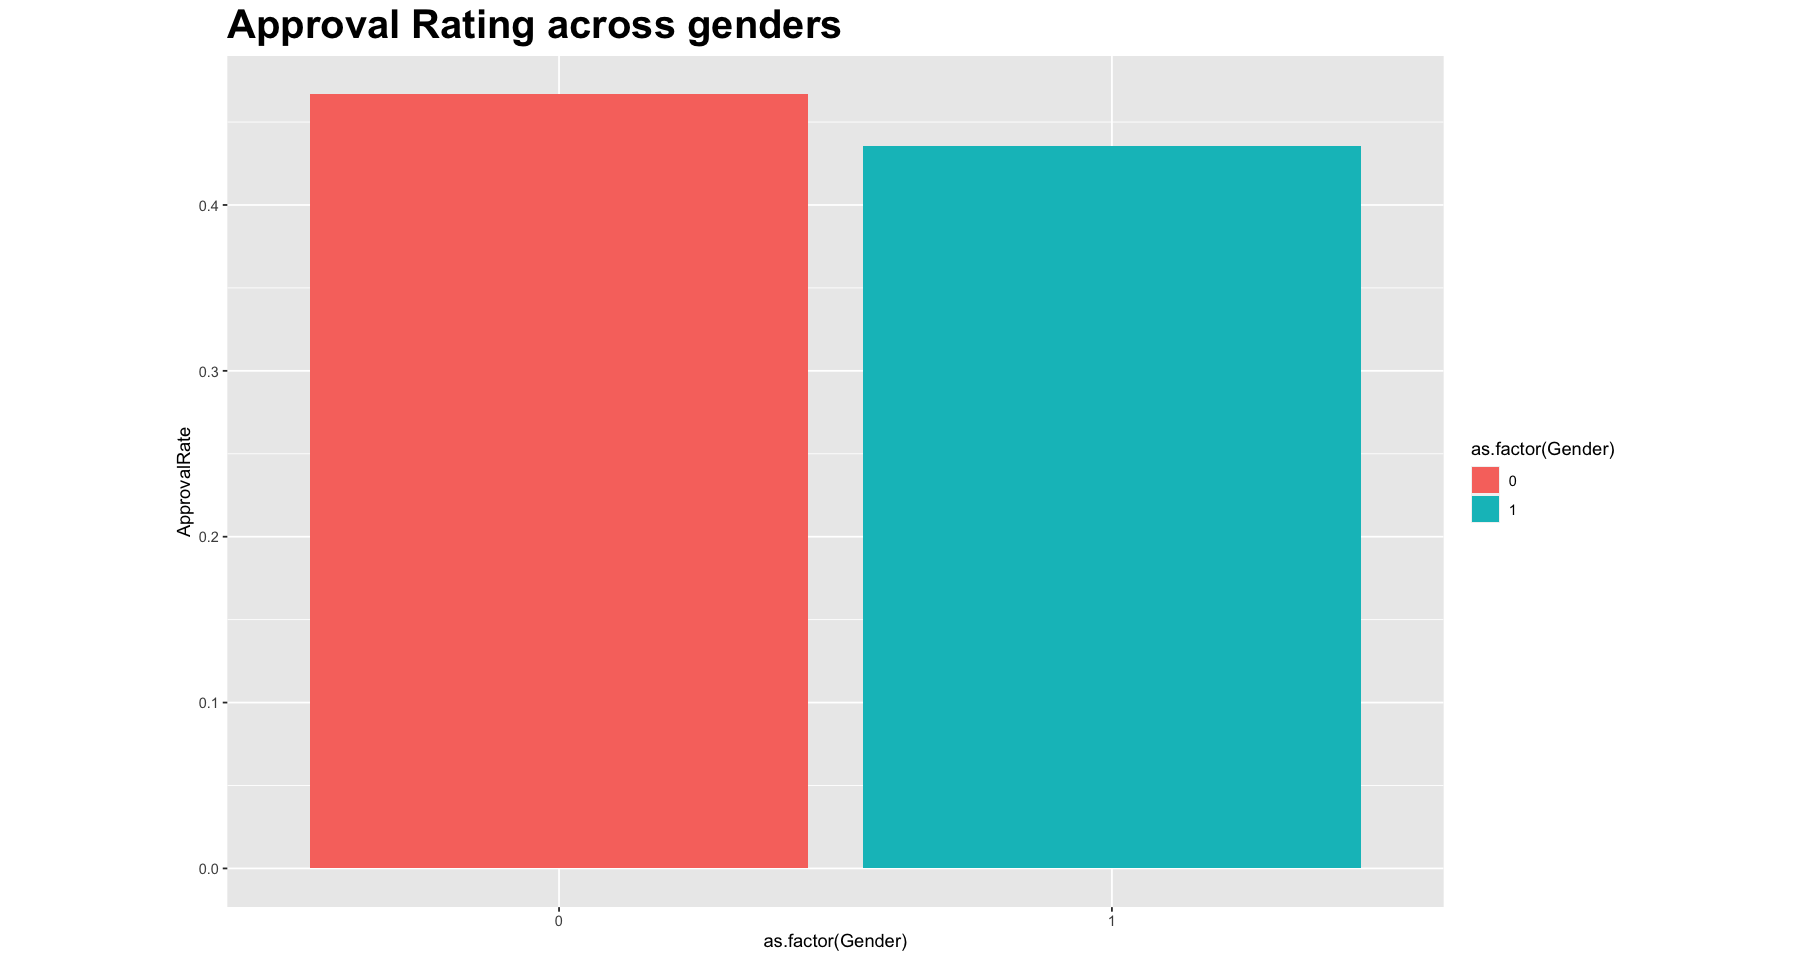

In [49]:
gender_appr <- approval_ds %>% group_by(Gender) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Gender), y=ApprovalRate, fill= as.factor(Gender)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across genders ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Gender


Ethnicity,ApprovalRate
<chr>,<dbl>
Asian,0.4237288
Black,0.6304348
Latino,0.1403509
Other,0.5000000
White,0.4240196


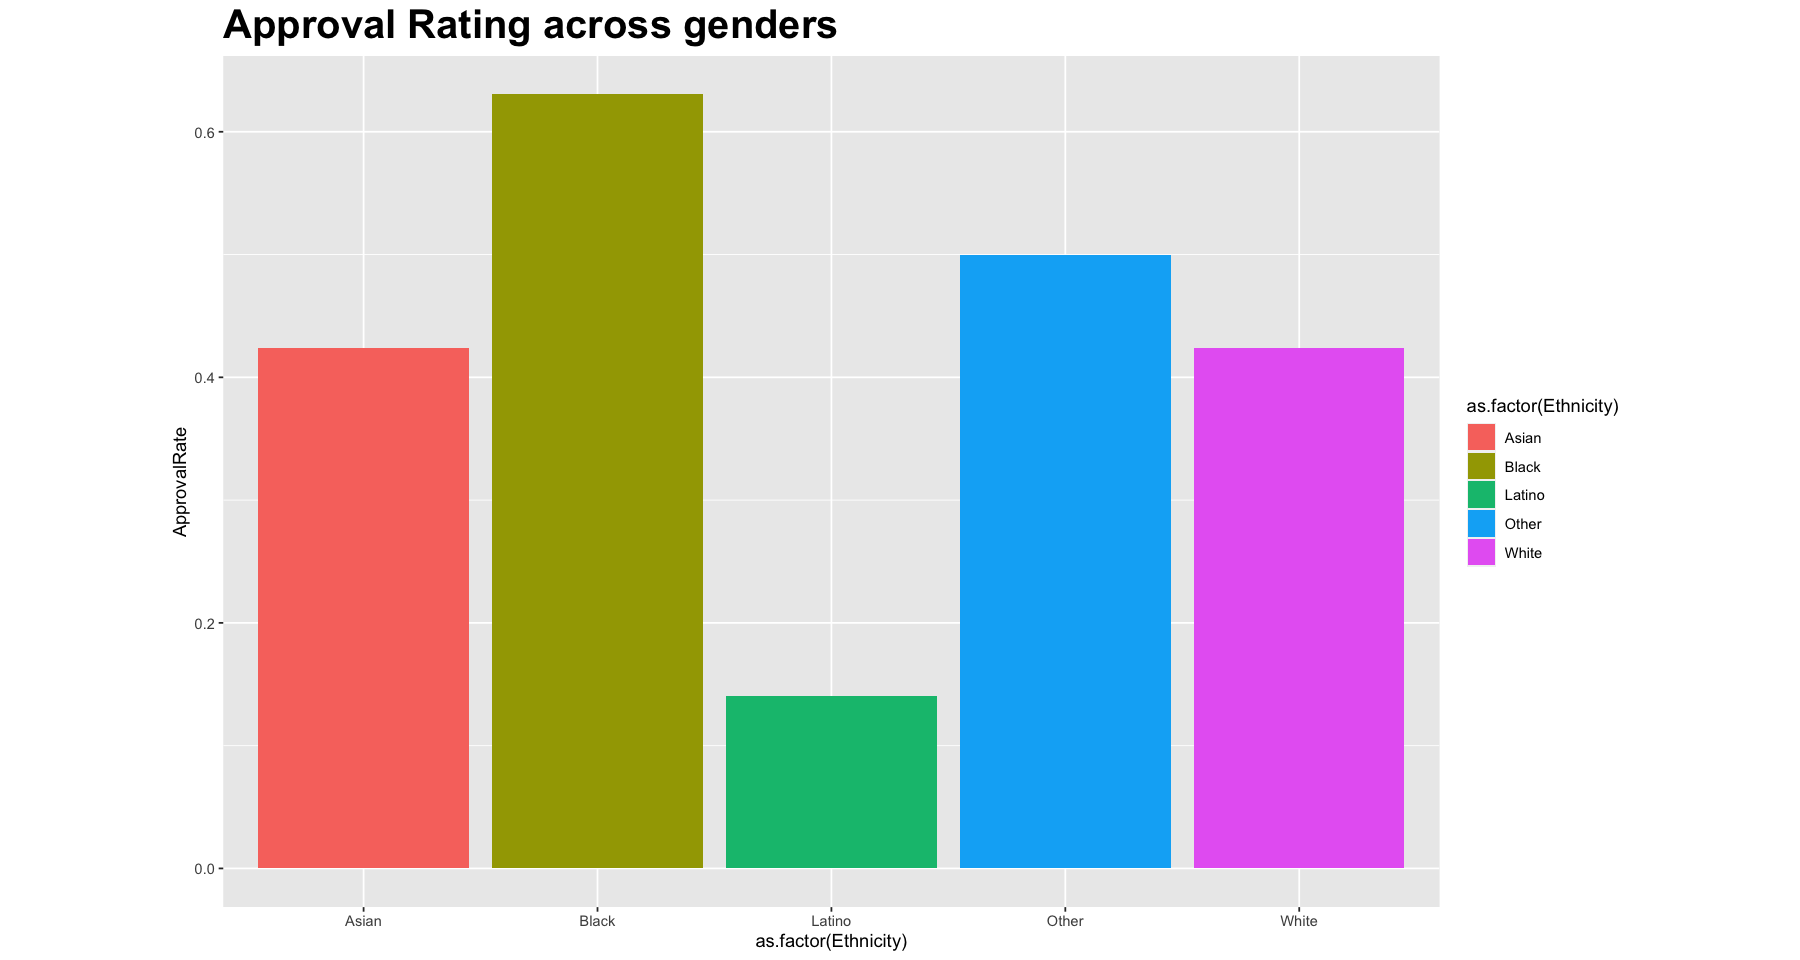

In [50]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=ApprovalRate, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across genders ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Married


Married,ApprovalRate
<int>,<dbl>
0,0.2848485
1,0.4952381


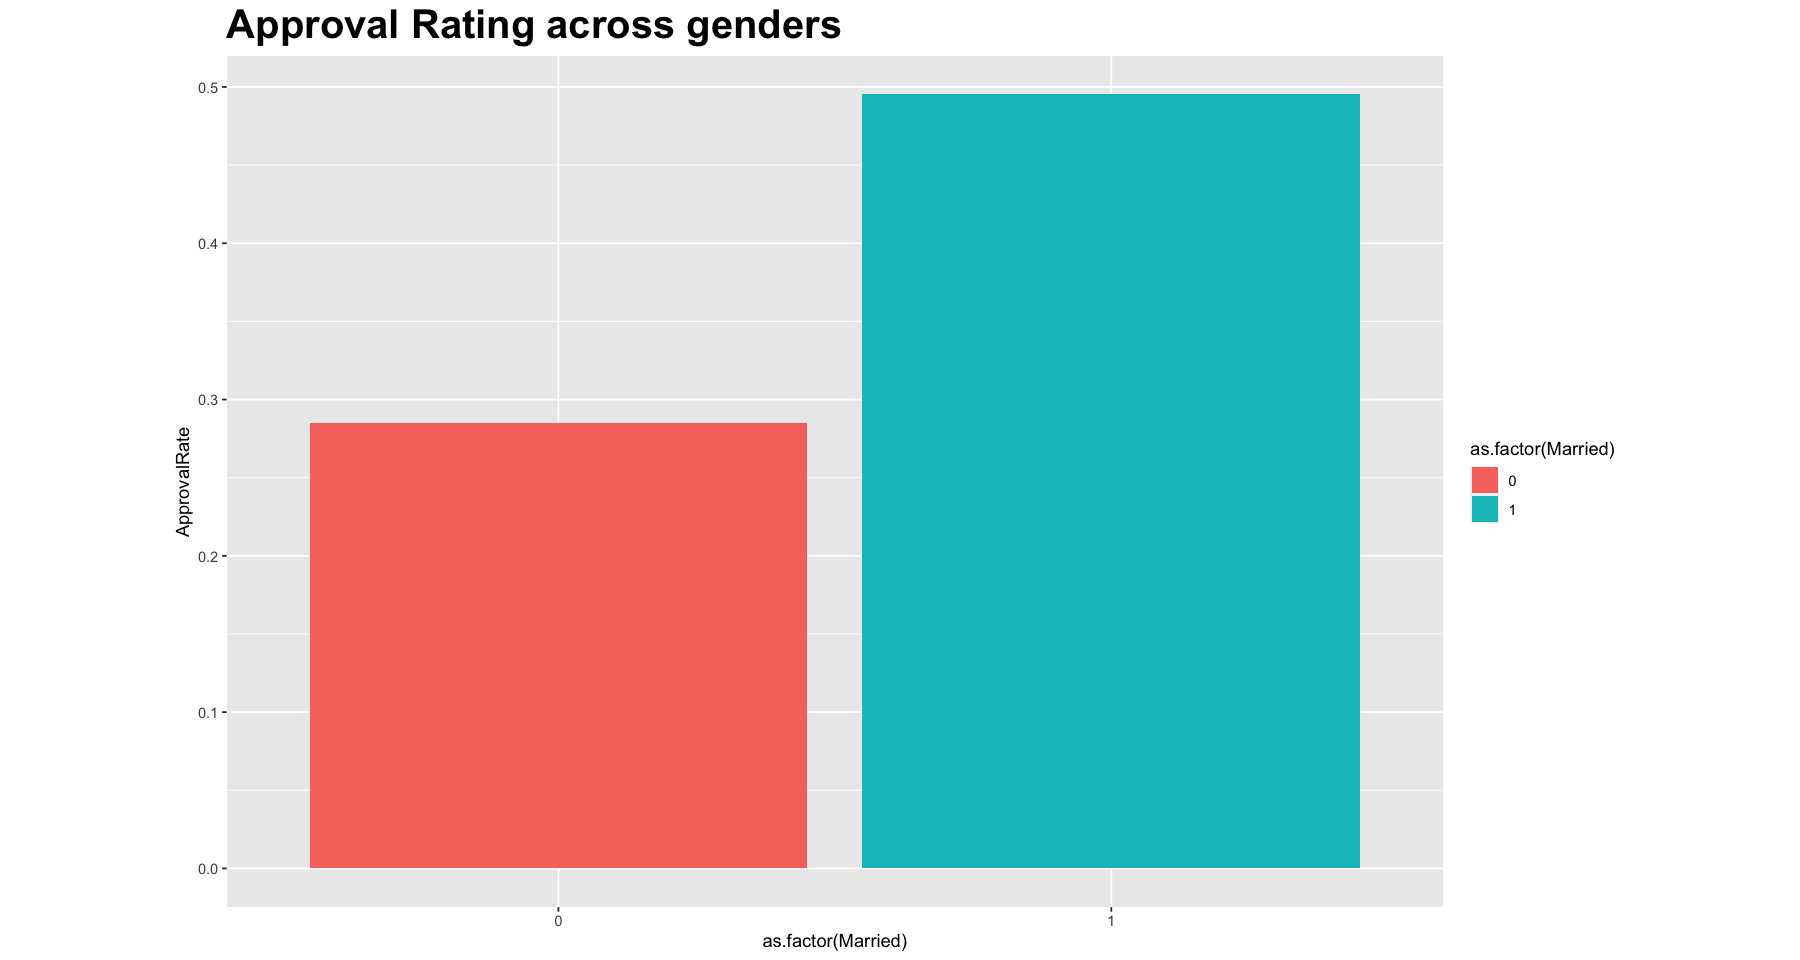

In [51]:
gender_appr <- approval_ds %>% group_by(Married) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Married), y=ApprovalRate, fill= as.factor(Married)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across genders ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Industry


Industry,ApprovalRate
<chr>,<dbl>
CommunicationServices,0.4210526
ConsumerDiscretionary,0.2372881
ConsumerStaples,0.3518519
Education,0.5600000
Energy,0.4520548
Financials,0.2745098


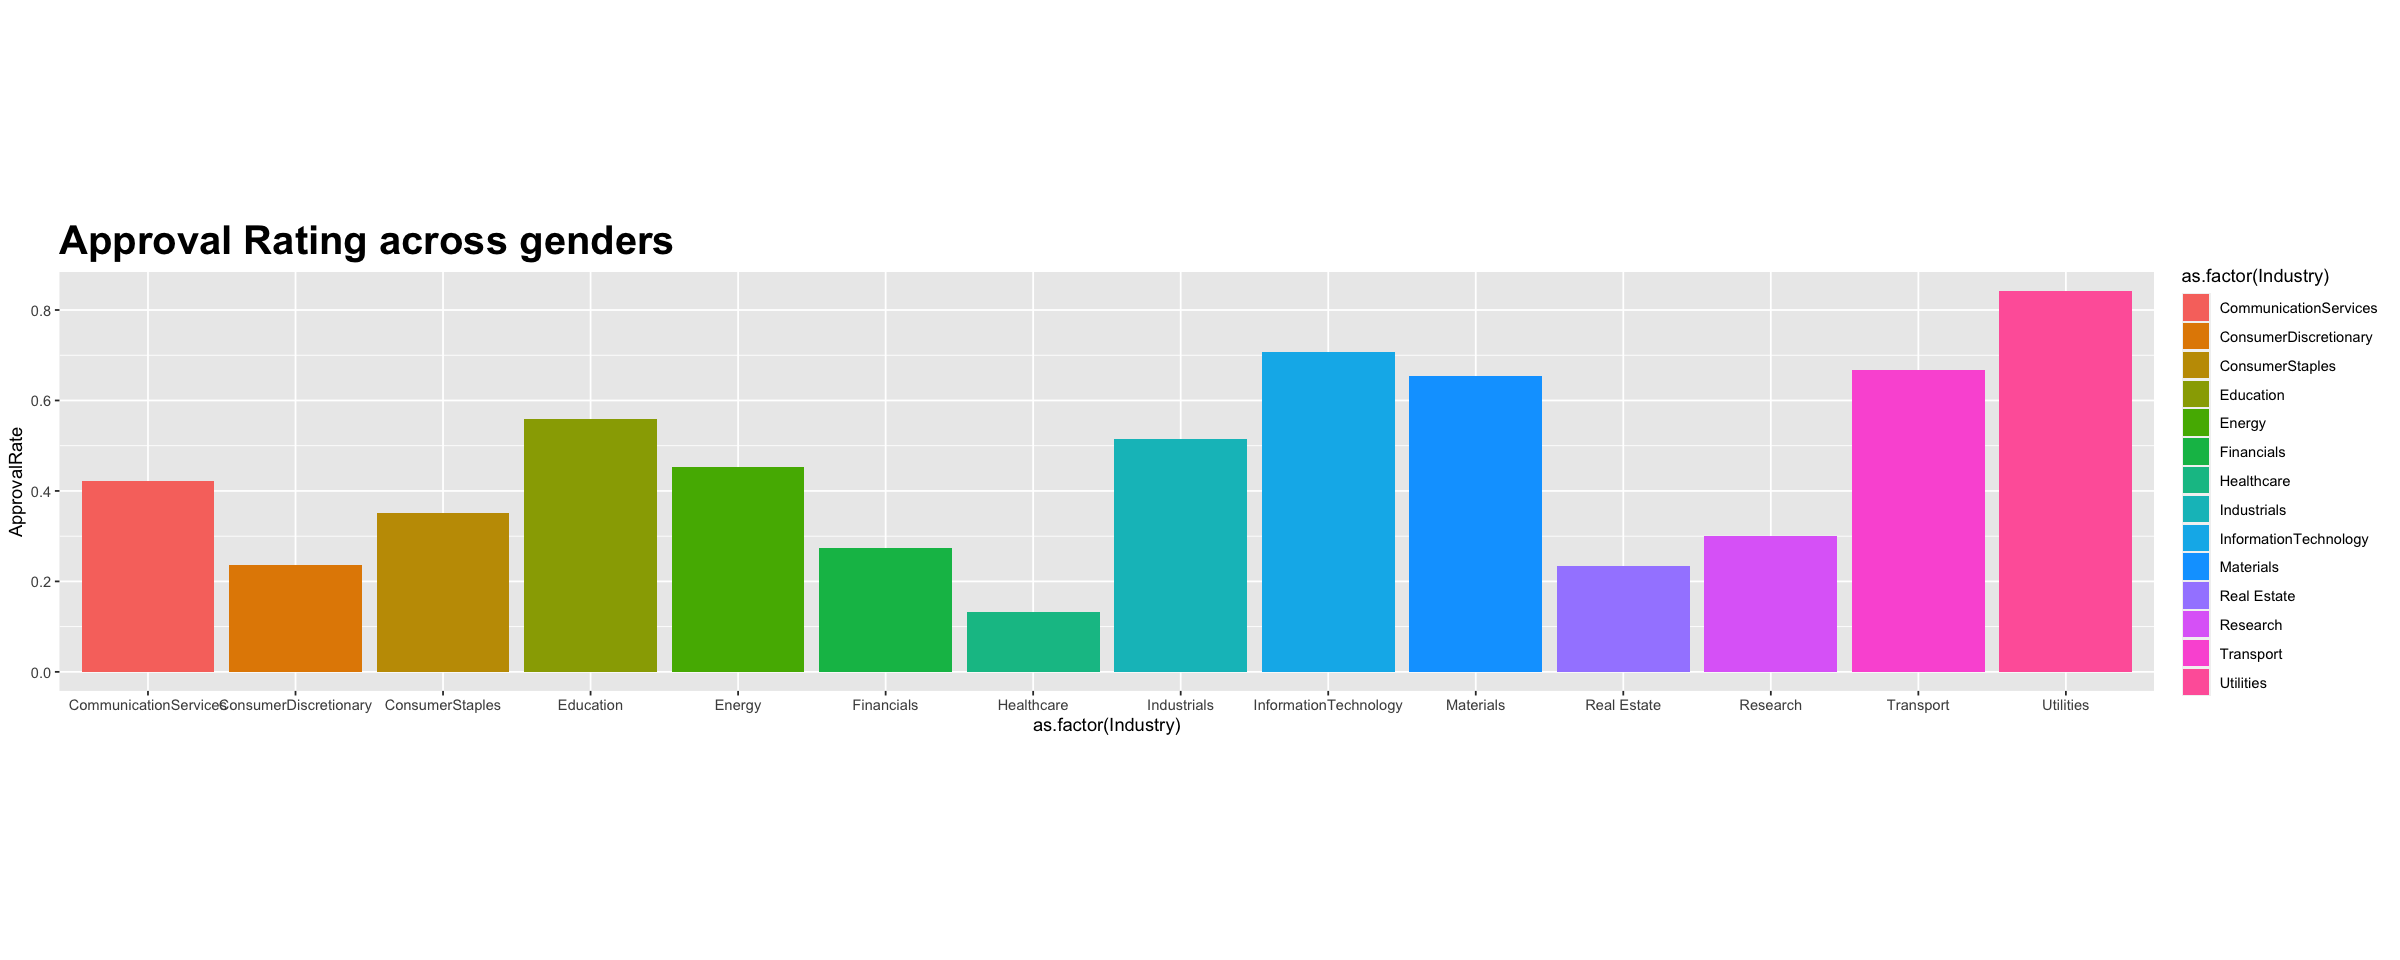

In [61]:
gender_appr <- approval_ds %>% group_by(Industry) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Industry), y=ApprovalRate, fill= as.factor(Industry)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across genders ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)